In [81]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-approval-clean-data/clean_dataset.csv
/kaggle/input/credit-card-approval-clean-data/crx.csv


In [82]:
df= pd.read_csv("/kaggle/input/credit-card-approval-clean-data/clean_dataset.csv")

In [83]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [84]:
df.tail(17)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
673,1,29.50,2.000,0,0,Education,Black,2.000,0,0,0,0,ByBirth,256,17,0
674,0,37.33,2.500,1,1,ConsumerDiscretionary,Black,0.210,0,0,0,0,ByBirth,260,246,0
675,0,41.58,1.040,1,1,ConsumerStaples,White,0.665,0,0,0,0,ByBirth,240,237,0
676,0,30.58,10.665,1,1,Materials,Black,0.085,0,1,12,1,ByBirth,129,3,0
677,1,19.42,7.250,1,1,CommunicationServices,White,0.040,0,1,1,0,ByBirth,100,1,0
678,0,17.92,10.210,1,1,Healthcare,Latino,0.000,0,0,0,0,ByBirth,0,50,0
679,0,20.08,1.250,1,1,Energy,White,0.000,0,0,0,0,ByBirth,0,0,0
680,1,19.50,0.290,1,1,Financials,White,0.290,0,0,0,0,ByBirth,280,364,0
681,1,27.83,1.000,0,0,Real Estate,Black,3.000,0,0,0,0,ByBirth,176,537,0
682,1,17.08,3.290,1,1,ConsumerDiscretionary,White,0.335,0,0,0,1,ByBirth,140,2,0


In [85]:
df.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


In [86]:
df = df.drop(['DriversLicense', 'ZipCode', 'Ethnicity', 'Industry', 'Citizen'], axis=1)


In [87]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Approved
0,1,30.83,0.000,1,1,1.25,1,1,1,0,1
1,0,58.67,4.460,1,1,3.04,1,1,6,560,1
2,0,24.50,0.500,1,1,1.50,1,0,0,824,1
3,1,27.83,1.540,1,1,3.75,1,1,5,3,1
4,1,20.17,5.625,1,1,1.71,1,0,0,0,1


In [88]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.33, random_state=42)

In [89]:
train_df = train_df.replace('?', np.NaN)
test_df = test_df.replace('?',np.NaN)

In [90]:
train_df.head()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Approved
382,0,24.33,2.500,0,0,4.50,0,0,0,456,0
137,1,33.58,2.750,1,1,4.25,1,1,6,0,1
346,1,32.25,1.500,1,1,0.25,0,0,0,122,0
326,1,30.17,1.085,0,0,0.04,0,0,0,179,0
33,0,36.75,5.125,1,1,5.00,1,0,0,4000,1


In [91]:
# Impute the missing values with mean imputation
train_df.fillna(train_df.mean(), inplace=True)
test_df.fillna(test_df.mean(), inplace=True)

# Count the number of NaNs in the datasets and print the counts to verify
print(train_df.isnull().sum())
print(test_df.isnull().sum())

Gender           0
Age              0
Debt             0
Married          0
BankCustomer     0
YearsEmployed    0
PriorDefault     0
Employed         0
CreditScore      0
Income           0
Approved         0
dtype: int64
Gender           0
Age              0
Debt             0
Married          0
BankCustomer     0
YearsEmployed    0
PriorDefault     0
Employed         0
CreditScore      0
Income           0
Approved         0
dtype: int64


In [92]:
train_df.head()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Approved
382,0,24.33,2.500,0,0,4.50,0,0,0,456,0
137,1,33.58,2.750,1,1,4.25,1,1,6,0,1
346,1,32.25,1.500,1,1,0.25,0,0,0,122,0
326,1,30.17,1.085,0,0,0.04,0,0,0,179,0
33,0,36.75,5.125,1,1,5.00,1,0,0,4000,1


In [93]:
train_df['Gender'].dtypes=='object'

False

In [94]:
train_df['Gender'].value_counts().index[0]

1

In [95]:
# Iterate over each column of cc_apps_train
for col in train_df.columns:
    # Check if the column is of object type
    if train_df[col].dtypes == 'object':
        # Impute with the most frequent value
        train_df = train_df.fillna(train_df[col].value_counts().index[0])
        test_df = test_df.fillna(train_df[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify
print(train_df.isnull().sum())
print(test_df.isnull().sum())

Gender           0
Age              0
Debt             0
Married          0
BankCustomer     0
YearsEmployed    0
PriorDefault     0
Employed         0
CreditScore      0
Income           0
Approved         0
dtype: int64
Gender           0
Age              0
Debt             0
Married          0
BankCustomer     0
YearsEmployed    0
PriorDefault     0
Employed         0
CreditScore      0
Income           0
Approved         0
dtype: int64


In [96]:
# Convert the categorical features in the train and test sets independently
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

# Reindex the columns of the test set aligning with the train set
test_df = test_df.reindex(columns=train_df.columns, fill_value=0)

In [97]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Segregate features and labels into separate variables
X_train, y_train = train_df.iloc[:, :-1].values, train_df.iloc[:, [-1]].values
X_test, y_test = test_df.iloc[:, :-1].values, test_df.iloc[:, [-1]].values

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

In [98]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [99]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test,y_test))

# Print the confusion matrix of the logreg model
confusion_matrix(y_test,y_pred)

Accuracy of logistic regression classifier:  0.8377192982456141


array([[98, 27],
       [10, 93]])

In [100]:
 #Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001 ,0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are the corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

In [102]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Fit grid_model to the data
grid_model_result = grid_model.fit(rescaledX_train, y_train)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

# Extract the best model and evaluate it on the test set
best_model = grid_model_result.best_estimator_
print("Accuracy of logistic regression classifier: ", best_model.score(rescaledX_test,y_test))

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best: 0.861501 using {'max_iter': 100, 'tol': 0.01}
Accuracy of logistic regression classifier:  0.8377192982456141


In [103]:
from sklearn.metrics import roc_curve, roc_auc_score

In [107]:
y_pred_proba = grid_model_result.predict_proba(rescaledX_test)

In [108]:
print(y_pred_proba)

[[0.83150227 0.16849773]
 [0.30696127 0.69303873]
 [0.93881171 0.06118829]
 [0.91670653 0.08329347]
 [0.96940564 0.03059436]
 [0.4653633  0.5346367 ]
 [0.96757471 0.03242529]
 [0.32927605 0.67072395]
 [0.93865967 0.06134033]
 [0.93446474 0.06553526]
 [0.93513448 0.06486552]
 [0.30120656 0.69879344]
 [0.93172123 0.06827877]
 [0.26698636 0.73301364]
 [0.81424979 0.18575021]
 [0.15976277 0.84023723]
 [0.96093186 0.03906814]
 [0.85113165 0.14886835]
 [0.92742631 0.07257369]
 [0.96561273 0.03438727]
 [0.84378814 0.15621186]
 [0.92865696 0.07134304]
 [0.96840477 0.03159523]
 [0.29101418 0.70898582]
 [0.96759942 0.03240058]
 [0.92403385 0.07596615]
 [0.05275847 0.94724153]
 [0.26177256 0.73822744]
 [0.93740081 0.06259919]
 [0.93454061 0.06545939]
 [0.12850328 0.87149672]
 [0.12470778 0.87529222]
 [0.24137878 0.75862122]
 [0.16299153 0.83700847]
 [0.32730086 0.67269914]
 [0.14900618 0.85099382]
 [0.04542266 0.95457734]
 [0.2963282  0.7036718 ]
 [0.16406103 0.83593897]
 [0.05277923 0.94722077]


In [109]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = roc_auc_score(y_test,y_pred_proba[:,1])
from sklearn.metrics import log_loss
log_loss(y_test,y_pred)

5.849189365777784

In [111]:
import matplotlib.pyplot as plt

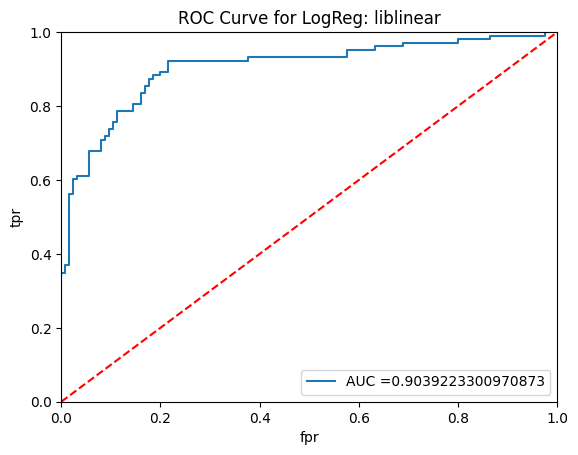

In [112]:
plt.title('ROC Curve for LogReg: liblinear')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr,tpr, label = 'AUC =' +str(roc_auc))
plt.legend(loc = 'best')
plt.show()